(module3-packages1/03-10-rdkit-descriptors)=
# 10. RDKit and Descriptors


# Desriptors and neuromuscular blockers  

The following is a list of neuromuscular blockers:
| Drug Name       | Notes |
|------------------|-------|
| Atracurium   | Benchmark; undergoes Hofmann elimination |
| Cisatracurium| Isomer of atracurium; fewer side effects |
| Vecuronium  | Intermediate-acting aminosteroid |
| Rocuronium   | Rapid onset; widely used in surgery |
| Pancuronium  | Long-acting aminosteroid |
| Mivacurium   | Short-acting benzylisoquinolinium |
| Tubocurarine | Natural product; historical use |

# Create a DataFrame of names and SMILES

In [1]:
import requests
import pandas as pd


# List of drug names to retrieve
drug_names = ["Atracurium", "Cisatracurium", "Vecuronium", 
              "Rocuronium", "Pancuronium", "Mivacurium", "Tubocurarine"]

# Prepare lists to store results
smiles_list = []

# Loop through names and retrieve Canonical SMILES
for name in drug_names:
    try:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/property/ConnectivitySMILES/JSON"
        res = requests.get(url)
        res.raise_for_status()
        smiles = res.json()['PropertyTable']['Properties'][0]['ConnectivitySMILES']
        smiles_list.append(smiles)
    except Exception as e:
        smiles_list.append(None)
        print(f"Could not retrieve SMILES for {name}: {e}")

# Create DataFrame

df = pd.DataFrame({"Name": drug_names, "SMILES": smiles_list})


# Display the DataFrame
df



,Name,SMILES
0,Atracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...
1,Cisatracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...
2,Vecuronium,CC(=O)OC1CC2CCC3C(C2(CC1N4CCCCC4)C)CCC5(C3CC(C...
3,Rocuronium,CC(=O)OC1C(CC2C1(CCC3C2CCC4C3(CC(C(C4)O)N5CCOC...
4,Pancuronium,CC(=O)OC1CC2CCC3C(C2(CC1[N+]4(CCCCC4)C)C)CCC5(...
5,Mivacurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C(=C3)OC)OC)...
6,Tubocurarine,CN1CCC2=CC(=C3C=C2C1CC4=CC=C(C=C4)OC5=C6C(CC7=...


# Add Field for RDKit molecualar objects 

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,SMILES,Mol
0,Atracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,
1,Cisatracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,
2,Vecuronium,CC(=O)OC1CC2CCC3C(C2(CC1N4CCCCC4)C)CCC5(C3CC(C...,
3,Rocuronium,CC(=O)OC1C(CC2C1(CCC3C2CCC4C3(CC(C(C4)O)N5CCOC...,
4,Pancuronium,CC(=O)OC1CC2CCC3C(C2(CC1[N+]4(CCCCC4)C)C)CCC5(...,
5,Mivacurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C(=C3)OC)OC)...,
6,Tubocurarine,CN1CCC2=CC(=C3C=C2C1CC4=CC=C(C=C4)OC5=C6C(CC7=...,

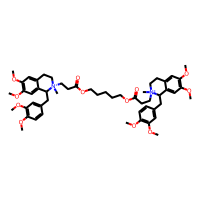
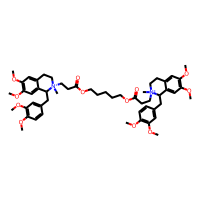
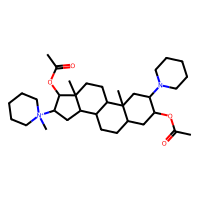
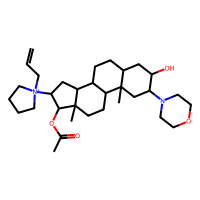
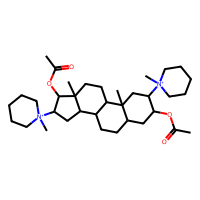
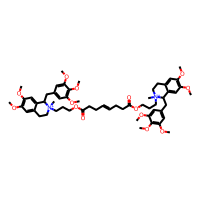
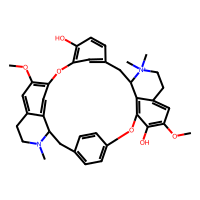

In [2]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole  # Enables RDKit molecule display in Jupyter
# Use pandas broadcasting (apply over the SMILES column) to generate RDKit Mol objects
df["Mol"] = df["SMILES"].apply(lambda s: Chem.MolFromSmiles(s) if pd.notna(s) else None)

# Optional: enable molecule image rendering in the DataFrame (for Jupyter notebooks)
PandasTools.RenderImagesInAllDataFrames(images=True)

# Display the DataFrame
df



What is the Data Type of the Mol column with the image

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,SMILES,Mol
0,Atracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,
1,Cisatracurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,
2,Vecuronium,CC(=O)OC1CC2CCC3C(C2(CC1N4CCCCC4)C)CCC5(C3CC(C...,
3,Rocuronium,CC(=O)OC1C(CC2C1(CCC3C2CCC4C3(CC(C(C4)O)N5CCOC...,
4,Pancuronium,CC(=O)OC1CC2CCC3C(C2(CC1[N+]4(CCCCC4)C)C)CCC5(...,
5,Mivacurium,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C(=C3)OC)OC)...,
6,Tubocurarine,CN1CCC2=CC(=C3C=C2C1CC4=CC=C(C=C4)OC5=C6C(CC7=...,

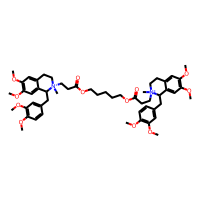
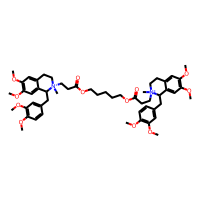
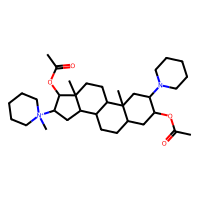
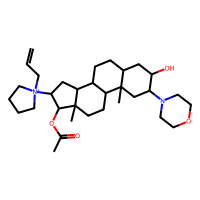
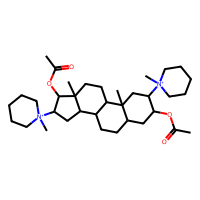
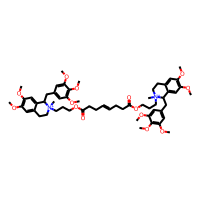
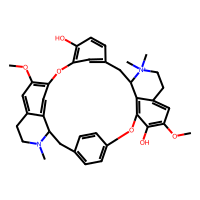

Column data types (based on first row):
Name: <class 'str'>
SMILES: <class 'str'>
Mol: <class 'rdkit.Chem.rdchem.Mol'>


In [3]:
# Render dataframe (shows molecule images)
display(df)

# Print out Python types under each column
print("Column data types (based on first row):")
for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")


## Drop SMILES Column
Let's remove the SMILES string since we no longer need it

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,Mol
0,Atracurium,
1,Cisatracurium,
2,Vecuronium,
3,Rocuronium,
4,Pancuronium,
5,Mivacurium,
6,Tubocurarine,

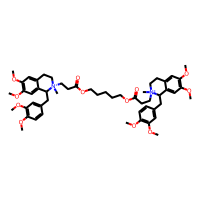
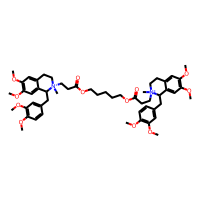
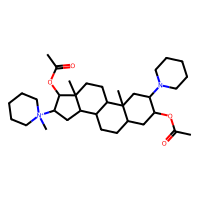
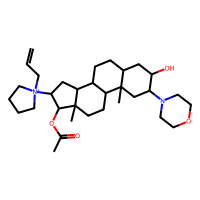
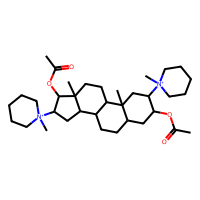
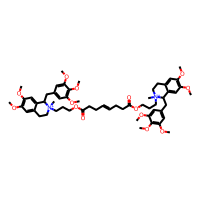
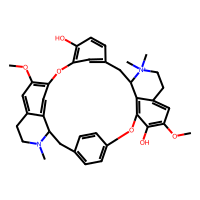

In [4]:
df.drop(columns=["SMILES"], inplace=True)
df

#  Lipinski Rule of Five:
A compound is likely to have good oral bioavailability if:
| Rule | Threshold | Why it matters |
|------|-----------|----------------|
| **≤ 5** hydrogen bond donors | H-bond donors = NH, OH groups | Too many → low permeability |
| **≤ 10** hydrogen bond acceptors | H-bond acceptors = N, O atoms | Too many → low absorption |
| **MW ≤ 500** Da | Molecular weight | Too large → poor absorption |
| **logP ≤ 5** | Partition coefficient (lipophilicity) | Too greasy → poor solubility |

> Note: It’s called “Rule of 5” because the numbers involved (5, 10, 500, logP 5) are all multiples of 5.


We are now going to add 4 new columns by applying a function (Descriptors.X) to each Mol in the column using apply(). We can do this because the mol column is not a column of images but a column pointers to the location of the rdkit molecular object in memory
* "MolWt" – Molecular Weight
* "LogP" – Octanol-water partition coefficient
* "HBD" – Number of H-bond donors
* "HBA" – Number of H-bond acceptors

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,Mol,MolWt,LogP,HBD,HBA
0,Atracurium,,929.161,8.0655,0,12
1,Cisatracurium,,929.161,8.0655,0,12
2,Vecuronium,,557.840,5.9659,0,5
3,Rocuronium,,529.786,4.4075,1,5
4,Pancuronium,,572.875,6.1105,0,4
5,Mivacurium,,1029.278,9.0290,0,14
6,Tubocurarine,,609.743,6.7010,2,7

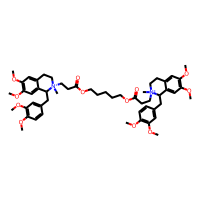
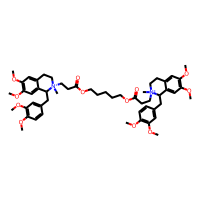
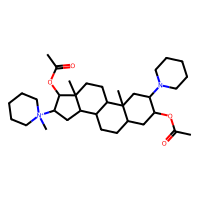
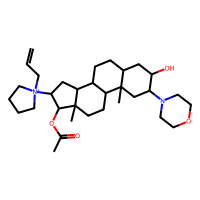
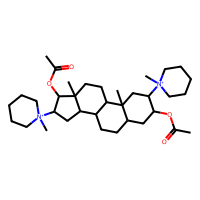
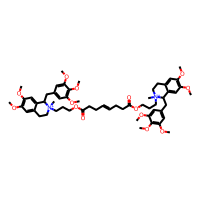
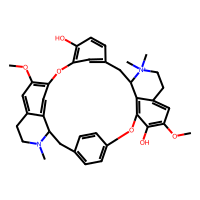

In [5]:
from rdkit.Chem import Descriptors

df["MolWt"] = df["Mol"].apply(Descriptors.MolWt)
df["LogP"] = df["Mol"].apply(Descriptors.MolLogP)
df["HBD"] = df["Mol"].apply(Descriptors.NumHDonors)
df["HBA"] = df["Mol"].apply(Descriptors.NumHAcceptors)
df

## Create Boolean Mask
Now we want to set up a Boolean Mask based on Lipinski's Rules. These columns are a set of True/False values based on a criteria. 
| Property | Threshold |
|----------|-----------|
| Molecular Weight | ≤ 500 |
| LogP             | ≤ 5   |
| HBD              | ≤ 5   |
| HBA              | ≤ 10  |


In [6]:
mw_ok   = df["MolWt"] <= 500
logp_ok = df["LogP"]  <= 5
hbd_ok  = df["HBD"]   <= 5
hba_ok  = df["HBA"]   <= 10
print(mw_ok)
print(type(mw_ok))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: MolWt, dtype: bool
<class 'pandas.core.series.Series'>


Lets now add new columns for each of the Boolean Series we created

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,Mol,MolWt,LogP,HBD,HBA,MW_OK,LogP_OK,HBD_OK,HBA_OK
0,Atracurium,,929.161,8.0655,0,12,False,False,True,False
1,Cisatracurium,,929.161,8.0655,0,12,False,False,True,False
2,Vecuronium,,557.840,5.9659,0,5,False,False,True,True
3,Rocuronium,,529.786,4.4075,1,5,False,True,True,True
4,Pancuronium,,572.875,6.1105,0,4,False,False,True,True
5,Mivacurium,,1029.278,9.0290,0,14,False,False,True,False
6,Tubocurarine,,609.743,6.7010,2,7,False,False,True,True

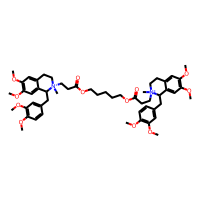
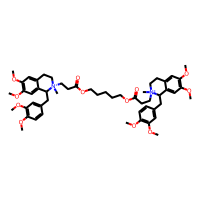
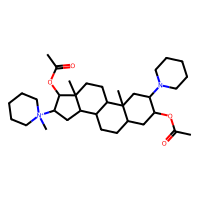
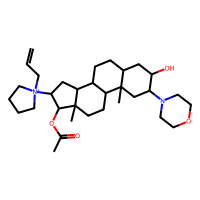
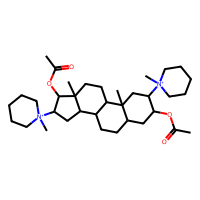
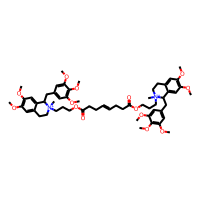
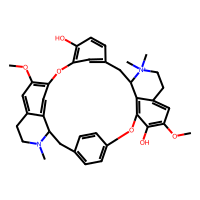

In [7]:
df["MW_OK"]   = mw_ok
df["LogP_OK"] = logp_ok
df["HBD_OK"]  = hbd_ok
df["HBA_OK"]  = hba_ok
df

Now lets make a Lipinski Score for the total pass count based on the 4 conditions

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,Mol,MolWt,LogP,HBD,HBA,MW_OK,LogP_OK,HBD_OK,HBA_OK,LipinskiPassCount,LipinskiFailCount
0,Atracurium,,929.161,8.0655,0,12,False,False,True,False,1,3
1,Cisatracurium,,929.161,8.0655,0,12,False,False,True,False,1,3
2,Vecuronium,,557.840,5.9659,0,5,False,False,True,True,2,2
3,Rocuronium,,529.786,4.4075,1,5,False,True,True,True,3,1
4,Pancuronium,,572.875,6.1105,0,4,False,False,True,True,2,2
5,Mivacurium,,1029.278,9.0290,0,14,False,False,True,False,1,3
6,Tubocurarine,,609.743,6.7010,2,7,False,False,True,True,2,2

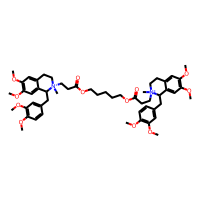
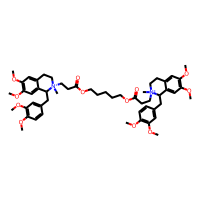
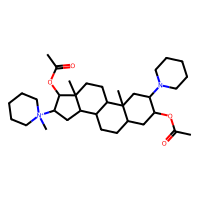
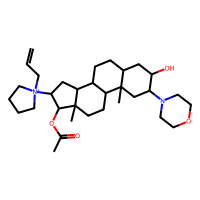
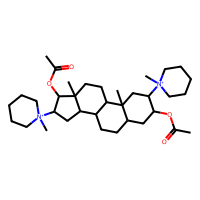
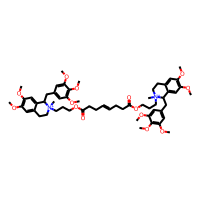
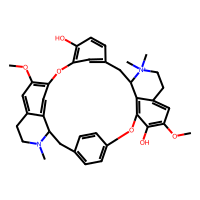

In [8]:
df["LipinskiPassCount"] = df[["MW_OK", "LogP_OK", "HBD_OK", "HBA_OK"]].sum(axis=1)
df["LipinskiFailCount"] = 4 - df["LipinskiPassCount"]
df

In [9]:
rule_cols = ["MW_OK", "LogP_OK", "HBD_OK", "HBA_OK"]
pass_fail_matrix = df[rule_cols]

pass_fail_matrix


/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,MW_OK,LogP_OK,HBD_OK,HBA_OK
0,False,False,True,False
1,False,False,True,False
2,False,False,True,True
3,False,True,True,True
4,False,False,True,True
5,False,False,True,False
6,False,False,True,True


In [10]:
pass_fail_numeric = pass_fail_matrix.astype(int)
pass_fail_numeric

/apps/share64/debian10/anaconda/anaconda-7/envs/MolSSI/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,MW_OK,LogP_OK,HBD_OK,HBA_OK
0,0,0,1,0
1,0,0,1,0
2,0,0,1,1
3,0,1,1,1
4,0,0,1,1
5,0,0,1,0
6,0,0,1,1


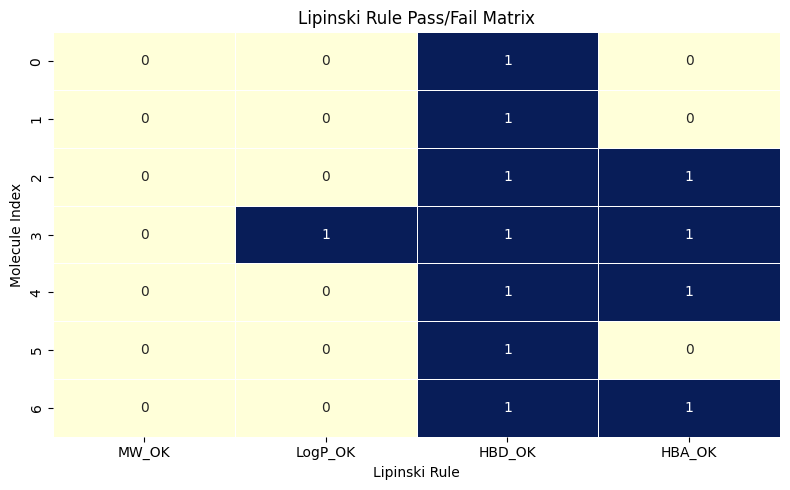

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(pass_fail_numeric, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5)

plt.title("Lipinski Rule Pass/Fail Matrix")
plt.xlabel("Lipinski Rule")
plt.ylabel("Molecule Index")
plt.tight_layout()
plt.show()


# Acknowledgments
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.